In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import erfc

#### Sigmoid activation function saturation

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

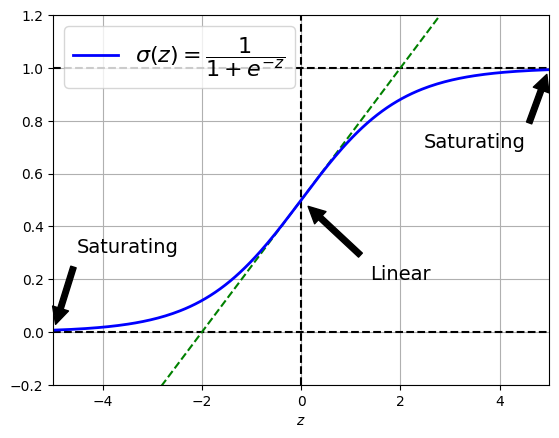

In [4]:
plt.plot([-5, 5], [0, 0], "k--")
plt.plot([-5, 5], [1, 1], "k--")
plt.plot([0, 0], [-0.2, 1.2], "k--")
plt.plot([-5, 5], [-3/4, 7/4], "g--")
plt.plot(z, sigmoid(z), "b-", linewidth=2, label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
props = dict(facecolor="black", shrink=0.1)
plt.annotate("Saturating", xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate("Saturating", xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate("Linear", xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")

plt.grid()
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)

### Xavier and He Initialization

In [8]:
dense = keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")

In [10]:
he_avg_init = keras.initializers.VarianceScaling(scale=2, mode="fan_avg", distribution="uniform")

dense = tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer=he_avg_init)

### Better Activations Functions

#### Leaky ReLU

In [13]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)

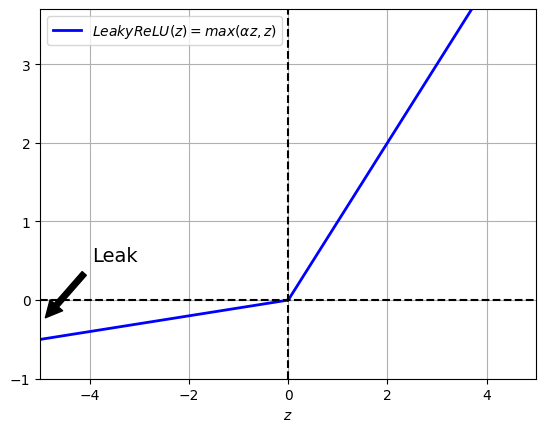

In [20]:
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], "k--")
plt.plot([0, 0], [-1, 3.7], "k--")
props = dict(facecolor="black", shrink=0.1)
plt.annotate("Leak", xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props, fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.grid()
plt.legend()

In [21]:
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
dense = keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")

In [22]:
model = keras.models.Sequential([
  #...
  keras.layers.Dense(50, kernel_initializer="he_normal"),
  keras.layers.LeakyReLU(alpha=0.2)
  #...
])

#### ELU & SELU

In [27]:
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

z = np.linspace(-5, 5, 200)

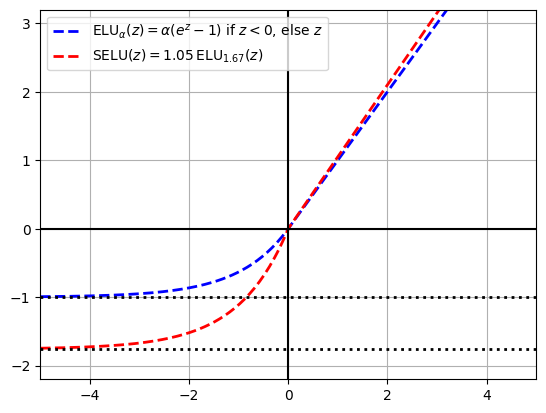

In [37]:
plt.plot(z, elu(z), "b--", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], "k-")
plt.plot([-5, 5], [-1, -1], "k:", linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], "k:", linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], "k-")
plt.grid()
plt.axis([-5, 5, -2.2, 3.2])
plt.legend()

In [38]:
dense = tf.keras.layers.Dense(50, activation="elu", kernel_initializer="he_normal")

In [39]:
dense = tf.keras.layers.Dense(50, activation="selu", kernel_initializer="lecun_normal")

#### GELU, Swish and Mish

In [41]:
def swish(z, beta=1):
    return z * sigmoid(beta * z)

def approx_gelu(z):
    return swish(z, beta=1.702)

def softplus(z):
    return np.log(1 + np.exp(z))

def mish(z):
    return z * np.tanh(softplus(z))

z = np.linspace(-4, 2, 200)
beta = 0.6 

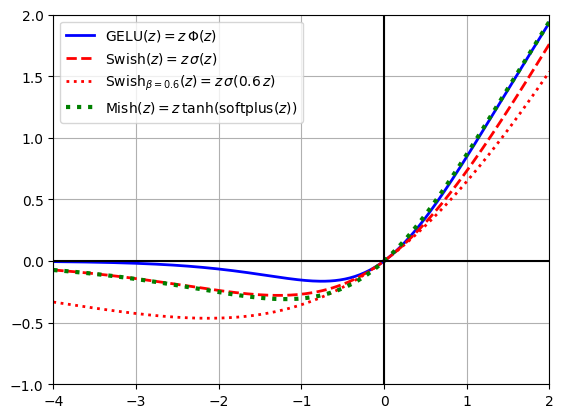

In [49]:
plt.plot(z, approx_gelu(z), "b-", linewidth=2, label=r"GELU$(z) = z\, \Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2, label=r"Swish$(z) = z\, \sigma(z)$")
plt.plot(z,  swish(z, beta), "r:", linewidth=2, label=fr"Swish$_{{\beta={beta}}}(z)=z\, \sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3, label=fr"Mish$(z) = z\, \tanh($softplus$(z))$")

plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.legend()

In [50]:
dense = tf.keras.layers.Dense(50, activation="gelu",
                              kernel_initializer="he_normal")

In [51]:
dense = tf.keras.layers.Dense(50, activation="swish",
                              kernel_initializer="he_normal")

### Batch normalization

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

In [12]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_7 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_8 (Batc  (None, 100)             

In [14]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization_6/gamma:0', True),
 ('batch_normalization_6/beta:0', True),
 ('batch_normalization_6/moving_mean:0', False),
 ('batch_normalization_6/moving_variance:0', False)]

In [15]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

his = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.5586 - accuracy: 0.8085 - val_loss: 0.3966 - val_accuracy: 0.8544
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4060 - accuracy: 0.8562 - val_loss: 0.3594 - val_accuracy: 0.8682
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3655 - accuracy: 0.8704 - val_loss: 0.3456 - val_accuracy: 0.8762
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3380 - accuracy: 0.8800 - val_loss: 0.3394 - val_accuracy: 0.8726
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3199 - accuracy: 0.8839 - val_loss: 0.3294 - val_accuracy: 0.8776
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3008 - accuracy: 0.8908 - val_loss: 0.3195 - val_accuracy: 0.8832
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2865 - accuracy: 0.8951 - val_loss: 0.3220 - val_accurac

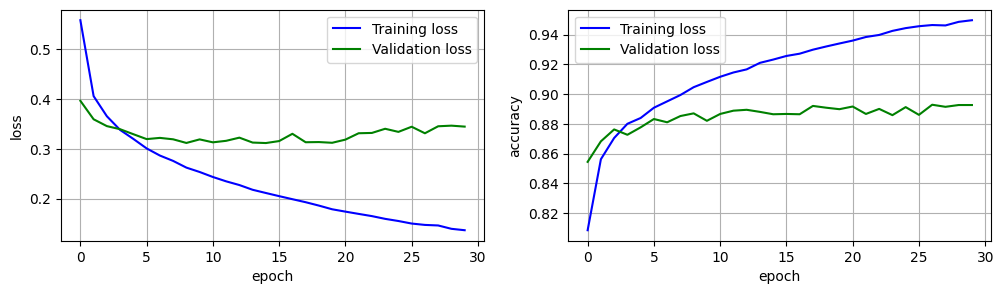

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 3))

plt.sca(axes[0])
plt.plot(his.epoch, his.history["loss"], "b", label="Training loss")
plt.plot(his.epoch, his.history["val_loss"], "g", label="Validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.legend()

plt.sca(axes[1])
plt.plot(his.epoch, his.history["accuracy"], "b", label="Training loss")
plt.plot(his.epoch, his.history["val_accuracy"], "g", label="Validation loss")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.legend()

In [20]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  
  keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),

  keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),

  keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235200    
                                                                 
 batch_normalization_9 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               30000     
                                                                 
 batch_normalization_10 (Bat  (None, 100)              400       
 chNormalization)                                     

In [22]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

his = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5985 - accuracy: 0.7998 - val_loss: 0.4242 - val_accuracy: 0.8498
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4229 - accuracy: 0.8514 - val_loss: 0.3778 - val_accuracy: 0.8634
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3767 - accuracy: 0.8665 - val_loss: 0.3504 - val_accuracy: 0.8746
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3464 - accuracy: 0.8777 - val_loss: 0.3421 - val_accuracy: 0.8764
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3262 - accuracy: 0.8827 - val_loss: 0.3350 - val_accuracy: 0.8738
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3075 - accuracy: 0.8893 - val_loss: 0.3165 - val_accuracy: 0.8832
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2934 - accuracy: 0.8946 - val_loss: 0.3341 - val_accuracy:

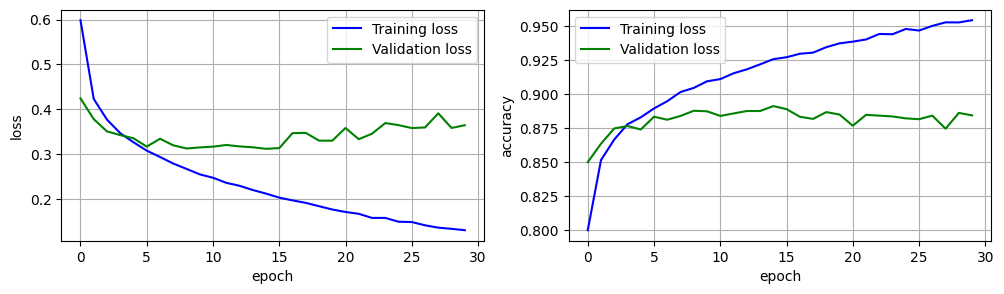

In [23]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 3))

plt.sca(axes[0])
plt.plot(his.epoch, his.history["loss"], "b", label="Training loss")
plt.plot(his.epoch, his.history["val_loss"], "g", label="Validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.legend()

plt.sca(axes[1])
plt.plot(his.epoch, his.history["accuracy"], "b", label="Training loss")
plt.plot(his.epoch, his.history["val_accuracy"], "g", label="Validation loss")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.legend()

#### Gradient Clipping

In [25]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

In [26]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

### Learning Rate Scheduling

In [8]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]

X_train, X_val, X_test = X_train / 255, X_val / 255, X_test / 255

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
def build_model(seed=42):
    tf.random.set_seed(seed)
  
    return keras.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dense(10, activation="softmax")
    ])


def build_and_train_model(optimizer):
    model = build_model()
    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
    )

    return model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

#### Power Scheduling

In [19]:
lr_schedule = keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)

optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
# optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [11]:
his_power_scheduling = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6818 - accuracy: 0.7683 - val_loss: 0.4875 - val_accuracy: 0.8294
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4664 - accuracy: 0.8359 - val_loss: 0.4555 - val_accuracy: 0.8358
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4231 - accuracy: 0.8489 - val_loss: 0.4198 - val_accuracy: 0.8556
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4009 - accuracy: 0.8572 - val_loss: 0.3914 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3834 - accuracy: 0.8640 - val_loss: 0.3942 - val_accuracy: 0.8562
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3702 - accuracy: 0.8669 - val_loss: 0.3847 - val_accuracy: 0.8680
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3608 - accuracy: 0.8706 - val_loss: 0.3775 - val_accuracy:

In [18]:
a = 1e-4
1/a

10000.0

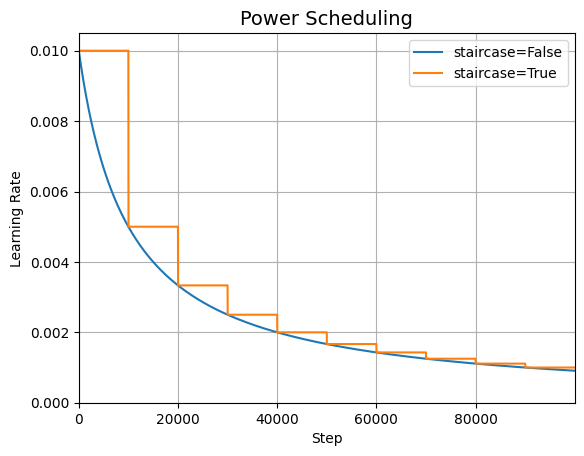

In [16]:
initial_learning_rate = 0.01
decay_rate = 1.0
decay_steps = 10_000

steps = np.arange(100_000)
lrs = initial_learning_rate / (1 + decay_rate * steps / decay_steps)
lrs2 = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))

plt.plot(steps, lrs, "-", label="staircase=False")
plt.plot(steps, lrs2, "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.legend()
plt.grid()

#### Exponential Scheduling

In [23]:
lr_scheduling = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=20_000,
    decay_rate=0.1,
    staircase=False
)

optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [24]:
his_exponential_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6762 - accuracy: 0.7678 - val_loss: 0.4964 - val_accuracy: 0.8232
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4696 - accuracy: 0.8348 - val_loss: 0.4582 - val_accuracy: 0.8336
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4246 - accuracy: 0.8503 - val_loss: 0.4114 - val_accuracy: 0.8564
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4022 - accuracy: 0.8587 - val_loss: 0.3887 - val_accuracy: 0.8620
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3839 - accuracy: 0.8650 - val_loss: 0.3871 - val_accuracy: 0.8644
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3704 - accuracy: 0.8693 - val_loss: 0.3869 - val_accuracy: 0.8662
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3599 - accuracy: 0.8716 - val_loss: 0.3713 - val_accuracy:

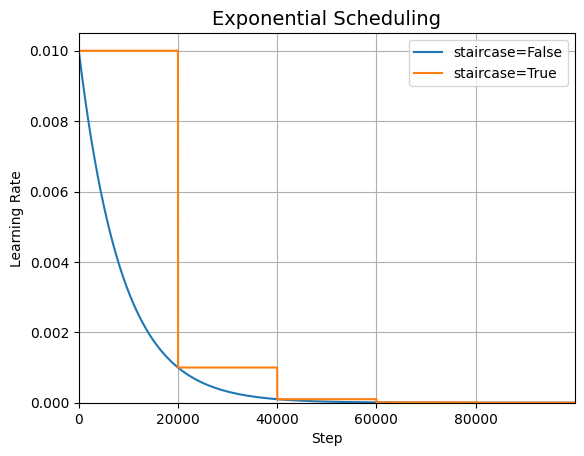

In [26]:
initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs, "-", label="staircase=False")
plt.plot(steps, lrs2, "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid()